In [1]:
import os
os.chdir('/Users/VSR/Desktop/AIT')

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model
model = load_model('/Users/VSR/Desktop/AIT.h5')

In [4]:
# Compile the model with metrics, even if you don't plan to further train it
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
import joblib

# Load the scaler
scaler_path = 'scaler.save'  # The path where you saved your scaler
scaler = joblib.load(scaler_path)




In [6]:
# Load the new data with specified column names, assuming no header in the file
data_path = 'AllSamplesUnlabeled.csv'  # Update this with your file path
new_data = pd.read_csv(data_path, names=["Band1", "Band2", "Band3", "Band4", "Band5", "Band7"], header=None)



In [7]:
# Extract the necessary features
features = new_data.values

# Normalize features using a new MinMaxScaler instance
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [8]:
# Preprocess the data: Apply the same scaling as was applied to the training data
features = new_data[["Band1", "Band2", "Band3", "Band4", "Band5", "Band7"]]
features_scaled = scaler.transform(features)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [9]:
# Reshape the data for the CNN if necessary
features_reshaped = features_scaled.reshape(-1, 6, 1)  # Adjust based on your model's input shape


In [10]:
new_data.head(10)

,Band1,Band2,Band3,Band4,Band5,Band7
0,174,167,173,141,186,187
1,192,191,182,154,202,195
2,192,179,171,147,197,187
3,190,179,173,144,197,187
4,169,162,163,128,184,178
5,158,162,163,128,165,167
6,169,162,163,131,157,161
7,176,175,173,137,169,174
8,178,175,176,131,180,181
9,183,175,180,141,188,184


In [11]:
new_data_scaled = scaler.transform(new_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [12]:
# Assume all columns are features and there is no label column
features = new_data.values

# Preprocess the data: Apply the same scaling as was applied to the training data
features_scaled = scaler.transform(features)


In [13]:
#  Predict in batches to manage memory more efficiently
def predict_in_batches(data, model, batch_size=1024):
    num_samples = data.shape[0]
    predictions = []
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_predictions = model.predict(data[start:end])
        predictions.append(batch_predictions)
    return np.concatenate(predictions, axis=0)


In [14]:
# Perform predictions
predictions = predict_in_batches(features_reshaped, model)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
32/32 ━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
32/32 ━━━━━━━━━━

In [15]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)



In [16]:
# Save the predictions to a CSV file
output_df = pd.DataFrame(predicted_classes, columns=['PredictedClass'])
output_df.to_csv('PredictedClasses.csv', index=False)

print("Classification complete. Results saved to 'PredictedClasses.csv'.")

Classification complete. Results saved to 'PredictedClasses.csv'.


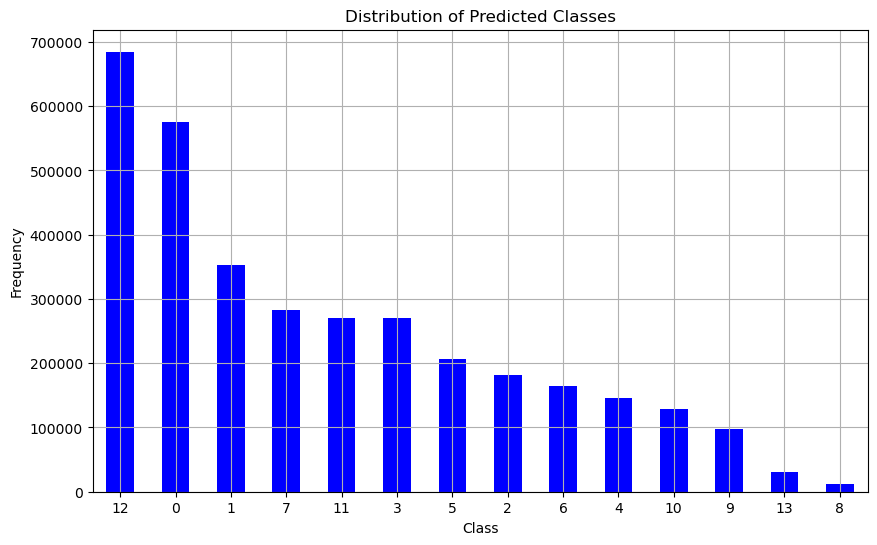

In [17]:


# Load the predicted classes data
data_path = 'PredictedClasses.csv'  # Make sure to provide the correct path
predicted_data = pd.read_csv(data_path)

# Calculate the distribution of predicted classes
class_distribution = predicted_data['PredictedClass'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(True)
plt.show()
